In [1]:
import os
import pandas as pd
%matplotlib inline

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [4]:
# Read your api key environment variable
from dotenv import load_dotenv
load_dotenv()

load_dotenv('c:/Users/Sungwon Kim/Fintech/.env')
api_key = os.getenv("NEWS_API")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
news_api = NewsApiClient(api_key = api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news = news_api.get_everything(q="bitcoin", 
                                          language="en", 
                                          page_size=100,
                                          sort_by="relevancy") 
bitcoin_news

{'status': 'ok',
 'totalResults': 4692,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Violet Blue',
   'title': "Twitter's Bitcoin hackers had almost limitless access",
   'description': 'On Wednesday, July 15, Twitter was the target of a very public hack attack that’s still sending shockwaves across the internet. In what is a major security breach for the company, a handful of the most-followed Twitter accounts belonging to some of the world’…',
   'url': 'https://www.engadget.com/twitter-bitcoin-scam-social-engineering-hack-access-193040357.html',
   'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-07%2Fca68c900-c85d-11ea-b9df-6238180027a8&client=amp-blogside-v2&signature=9b0fbb183070e467429323ab75f41cbbe1c8dbc3',
   'publishedAt': '2020-07-17T19:30:40Z',
   'content': 'Just hackers burning up 0day like it’s a fire sale\r\nImagin

In [7]:
# Fetch the Ethereum news articles
ethereum_news = news_api.get_everything(q="ethereum", 
                                          language="en", 
                                          page_size=100,
                                          sort_by="relevancy") 
ethereum_news

{'status': 'ok',
 'totalResults': 922,
 'articles': [{'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'John Biggs',
   'title': 'Banks Can Now Hold Cryptocurrencies, As a Treat',
   'description': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.Read more...',
   'url': 'https://gizmodo.com/banks-can-now-hold-cryptocurrencies-as-a-treat-1844473085',
   'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/ur0b3oxdebji9s0boue7.jpg',
   'publishedAt': '2020-07-22T21:45:00Z',
   'content': 'According to a public letter from the U.S. Comptroller of the Currency, the federal group responsible for the security of the banking system, banks are now allowed to hold cryptocurrencies.\r\nThis doe… [+1760 chars]'},
  {'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'a

In [8]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiment.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiment)

# Reorder DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text",]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,compound,negative,neutral,positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.1779,0.057,0.866,0.078,The company blacklisted the bitcoin address\r\...


In [9]:
bitcoin_df["text"]

0     Just hackers burning up 0day like it’s a fire ...
1     Reuters had previously reported the FBI would ...
2     Most of these accounts tweeted some variant of...
3     Our investigation and cooperation with law enf...
4     The company blacklisted the bitcoin address\r\...
5     Bitcoin scams are causing a lot of headaches r...
6     Much as with Twitter, the YouTube scams use Wo...
7     Image copyrightAFP/REUTERSImage caption\r\n Ki...
8     A number of high-profile Twitter accounts were...
9     A gigantic breach of Twitters security yesterd...
10    Image copyrightReuters / AFP\r\nTwitter says h...
11    On the back of a major security breach last we...
12    Last week’s hack of over 100 very high-profile...
13    2020 sure does suck so far. But the year might...
14    San Francisco (CNN Business)Twitter(TWTR) acco...
15    Something normal happened on Twitter earlier t...
16    Twitter spectacularly shit the bed on Wednesda...
17    The threat of ransomware may seem ubiquito

### Dropping out duplicated texts 
 
This is actually what I found after completing the wordcloud. Some weird name and words were popping up with importance which I thought of trivial. So I had to go back here to see what happened to the texts. Clearly, we can observe specific articles are repeated(31 to 44, and 48). We're going to pull out these from our task. Fortunately, we didn't find any redundancy in the articles of ethereum. 

In [10]:
#  Dropping duplicated texts from the dataframe
bitcoin_df = bitcoin_df.drop(index=bitcoin_df.index[31:45])
bitcoin_df

,compound,negative,neutral,positive,text
0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...
1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...
2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...
3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...
4,0.1779,0.057,0.866,0.078,The company blacklisted the bitcoin address\r\...
5,-0.8804,0.247,0.753,0.000,Bitcoin scams are causing a lot of headaches r...
6,-0.6808,0.153,0.847,0.000,"Much as with Twitter, the YouTube scams use Wo..."
7,0.1280,0.000,0.951,0.049,Image copyrightAFP/REUTERSImage caption\r\n Ki...
8,-0.8689,0.277,0.687,0.036,A number of high-profile Twitter accounts were...
9,-0.7003,0.191,0.745,0.064,A gigantic breach of Twitters security yesterd...


In [31]:
# Finally, let's reset the index
bitcoin_df = bitcoin_df.reset_index()

In [11]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiment = []

for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiment.append({
            "text" : text,
            "compound" : compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiment)

# Reorder DataFrame columns
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,compound,negative,neutral,positive,text
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...
1,0.2263,0.000,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a..."
2,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...
3,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...
4,-0.3400,0.088,0.912,0.000,"Lightweight, open-source, universal paper wall..."


In [12]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,86.000000,86.000000,86.000000,86.000000
mean,-0.111280,0.068233,0.885244,0.046558
std,0.432906,0.071038,0.084880,0.058306
min,-0.880400,0.000000,0.678000,0.000000
25%,-0.476700,0.000000,0.820750,0.000000
50%,0.000000,0.060500,0.887500,0.017000
75%,0.121675,0.111000,0.943500,0.074500
max,0.790100,0.277000,1.000000,0.216000


In [13]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,97.000000,97.000000,97.000000,97.000000
mean,0.150879,0.032258,0.903309,0.064443
std,0.396345,0.047846,0.080160,0.070579
min,-0.709600,0.000000,0.660000,0.000000
25%,0.000000,0.000000,0.847000,0.000000
50%,0.000000,0.000000,0.912000,0.060000
75%,0.458800,0.058000,1.000000,0.119000
max,0.859100,0.177000,1.000000,0.280000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum did with a mean positive score of 0.064

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score at 0.859

Q. Which coin had the highest positive score?

A: Again, ethereum had the highest positive score at 0.28.

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [15]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))

In [19]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation
    regex = re.compile('[^a-zA-z]')
    re_clean = regex.sub(' ', text)
    # Tokenize words    
    words = word_tokenize(re_clean)
     # Lemmatize Words into root words
    lem = [WordNetLemmatizer().lemmatize(word) for word in words]
    # Convert the words to lowercase and remove the stop words
    sw_addon = {'[', ']'}
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return tokens

In [32]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(bitcoin_df["text"][i]) for i in range(0, len(bitcoin_df))]
bitcoin_df["tokens"] = bitcoin_tokens
bitcoin_df.head()

,index,compound,negative,neutral,positive,text,tokens
0,0,0.0258,0.059,0.880,0.061,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, sale, imagi..."
1,1,0.0772,0.000,0.962,0.038,Reuters had previously reported the FBI would ...,"[reuters, previously, reported, fbi, would, la..."
2,2,0.0000,0.000,1.000,0.000,Most of these accounts tweeted some variant of...,"[account, tweeted, variant, message, someone, ..."
3,3,0.5994,0.000,0.851,0.149,Our investigation and cooperation with law enf...,"[investigation, cooperation, law, enforcement,..."
4,4,0.1779,0.057,0.866,0.078,The company blacklisted the bitcoin address\r\...,"[company, blacklisted, bitcoin, address, illus..."


In [25]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(ethereum_df["text"][i]) for i in range(0, len(ethereum_df))]
ethereum_df["tokens"] = ethereum_tokens
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.5719,0.000,0.868,0.132,According to a public letter from the U.S. Com...,"[according, public, letter, u, comptroller, cu..."
1,0.2263,0.000,0.947,0.053,"When the inventor of AWS Lambda, Tim Wagner, a...","[inventor, aws, lambda, tim, wagner, former, h..."
2,-0.6808,0.177,0.823,0.000,Enlarge/ A screenshot from Wozniak's lawsuit s...,"[enlarge, screenshot, wozniak, lawsuit, show, ..."
3,0.3612,0.051,0.847,0.102,Interest in bitcoin and other cryptocurrencies...,"[interest, bitcoin, cryptocurrencies, includin..."
4,-0.3400,0.088,0.912,0.000,"Lightweight, open-source, universal paper wall...","[lightweight, open, source, universal, paper, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [33]:
from collections import Counter
from nltk import ngrams

In [49]:
# Let's create corpus(or corpora) for the columns containing tokens at each dataframe.
tokens_bitcoin = bitcoin_df["tokens"]
corpus_bitcoin = [tokens_bitcoin[i] for i in range(0, len(bitcoin_df))]

tokens_ethereum = ethereum_df["tokens"]
corpus_ethereum = [' '.join(tokens_ethereum[i]) for i in range(0, len(ethereum_df))]

In [50]:
# Generate the Bitcoin N-grams where N=2
bigram_bitcoin = [Counter(ngrams(tokens_bitcoin[i], n=2)) for i in range(0, len(bitcoin_df))]
bigram_bitcoin

[Counter({('hacker', 'burning'): 1,
          ('burning', 'day'): 1,
          ('day', 'like'): 1,
          ('like', 'fire'): 1,
          ('fire', 'sale'): 1,
          ('sale', 'imagine'): 1,
          ('imagine', 'getting'): 1,
          ('getting', 'key'): 1,
          ('key', 'twitter'): 1,
          ('twitter', 'kingdom'): 1,
          ('kingdom', 'access'): 1,
          ('access', 'account'): 1,
          ('account', 'admin'): 1,
          ('admin', 'panel'): 1,
          ('panel', 'world'): 1,
          ('world', 'would'): 1,
          ('would', 'could'): 1,
          ('could', 'grab'): 1,
          ('grab', 'high'): 1,
          ('high', 'valu'): 1,
          ('valu', 'char'): 1}),
 Counter({('reuters', 'previously'): 1,
          ('previously', 'reported'): 1,
          ('reported', 'fbi'): 1,
          ('fbi', 'would'): 1,
          ('would', 'launch'): 1,
          ('launch', 'investigation'): 1,
          ('investigation', 'hack'): 1,
          ('hack', 'fbi'): 1,
       

In [51]:
# Generate the Ethereum N-grams where N=2
bigram_ethereum = [Counter(ngrams(tokens_ethereum[i], n=2)) for i in range(0, len(ethereum_df))]
bigram_ethereum

[Counter({('according', 'public'): 1,
          ('public', 'letter'): 1,
          ('letter', 'u'): 1,
          ('u', 'comptroller'): 1,
          ('comptroller', 'currency'): 1,
          ('currency', 'federal'): 1,
          ('federal', 'group'): 1,
          ('group', 'responsible'): 1,
          ('responsible', 'security'): 1,
          ('security', 'banking'): 1,
          ('banking', 'system'): 1,
          ('system', 'bank'): 1,
          ('bank', 'allowed'): 1,
          ('allowed', 'hold'): 1,
          ('hold', 'cryptocurrencies'): 1,
          ('cryptocurrencies', 'doe'): 1,
          ('doe', 'char'): 1}),
 Counter({('inventor', 'aws'): 1,
          ('aws', 'lambda'): 1,
          ('lambda', 'tim'): 1,
          ('tim', 'wagner'): 1,
          ('wagner', 'former'): 1,
          ('former', 'head'): 1,
          ('head', 'blockchain'): 1,
          ('blockchain', 'aws'): 1,
          ('aws', 'shruthi'): 1,
          ('shruthi', 'rao'): 1,
          ('rao', 'co'): 1,
         

In [38]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
     # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    words = word_tokenize(big_string)
    bigrams = ngrams(words, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))  
    return Counter(top_10).most_common(N)

In [39]:
# Get the top 10 words for Bitcoin
token_count(corpus_bitcoin)

[(('twitter', 'account'), 21),
 (('high', 'profile'), 18),
 (('elon', 'musk'), 15),
 (('char', 'twitter'), 11),
 (('barack', 'obama'), 10),
 (('bill', 'gates'), 9),
 (('profile', 'account'), 7),
 (('joe', 'biden'), 7),
 (('bitcoin', 'scam'), 6),
 (('profile', 'twitter'), 6)]

In [52]:
# Get the top 10 words for Ethereum
token_count(corpus_ethereum)

[(('char', 'ethereum'), 10),
 (('ul', 'li'), 10),
 (('bitcoin', 'ethereum'), 8),
 (('char', 'bitcoin'), 7),
 (('li', 'li'), 6),
 (('char', 'day'), 6),
 (('day', 'ahead'), 6),
 (('ahead', 'ethereum'), 6),
 (('ethereum', 'would'), 6),
 (('would', 'need'), 6)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

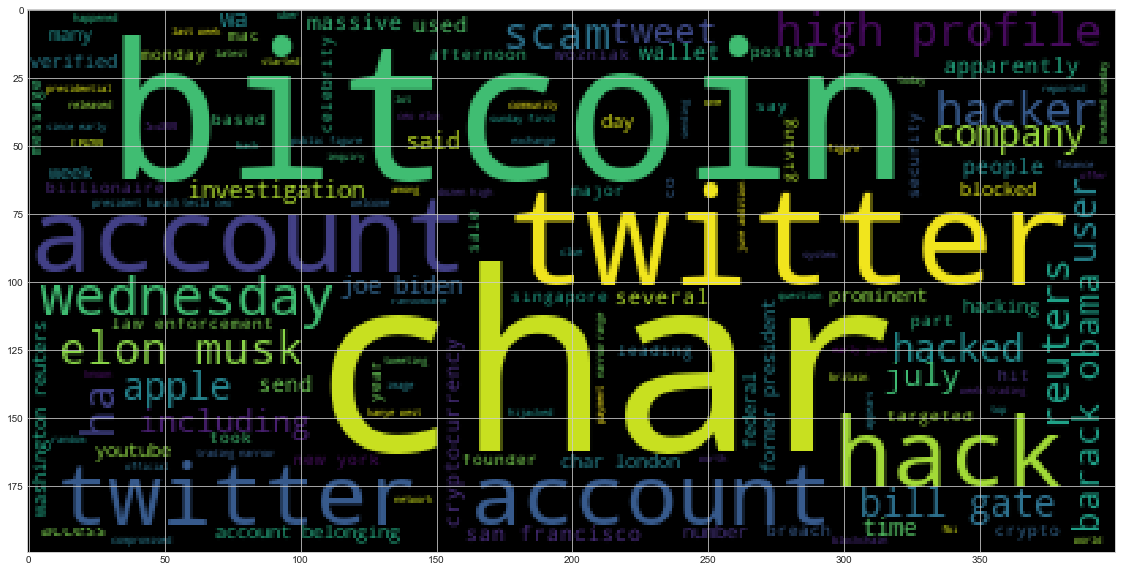

In [42]:
# Generate the Bitcoin word cloud
bitcoin_bigstring = ' '.join(corpus_bitcoin)
input_text_bitcoin = ' '.join(tokenizer(bitcoin_bigstring))
wc = WordCloud().generate(input_text_bitcoin )
plt.imshow(wc)

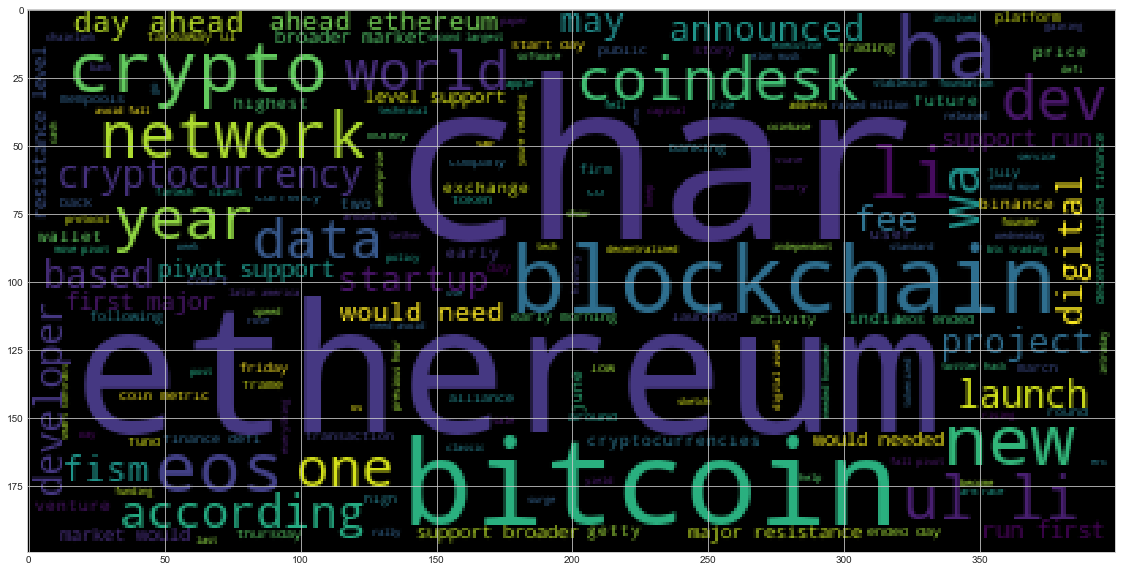

In [44]:
# Generate the Ethereum word cloud
ethereum_bigstring = ' '.join(corpus_ethereum)
input_text_ethereum = ' '.join(tokenizer(ethereum_bigstring))
wc = WordCloud().generate(input_text_ethereum)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [53]:
import spacy
from spacy import displacy

In [ ]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [54]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [55]:
' '.join(bitcoin_df["text"])

'Just hackers burning up 0day like it’s a fire sale\r\nImagine getting the keys to the Twitter kingdom -- access to all the account admin panels in the world. What would you do? You could grab high-valu… [+8860 chars] Reuters had previously reported the FBI would launch an investigation into the hack.\r\nThe FBI inquiry is now one of multiple investigations into the incident, which has drawn scrutiny from a number o… [+966 chars] Most of these accounts tweeted some variant of the same message: If someone were to send Bitcoin to the address specified in the tweets during a 30-minute window, the account owner would return doubl… [+3388 chars] Our investigation and cooperation with law enforcement continues, and we remain committed to sharing any updates here. More to come via @TwitterSupport as our investigation continues.\r\n— Twitter Supp… [+1321 chars] The company blacklisted the bitcoin address\r\nIllustration by Alex Castro\r\nThe cryptocurrency exchange Coinbase said that it stoppe

In [57]:
# Concatenate all of the bitcoin text together
bitcoin_article = ' '.join(bitcoin_df["text"])

In [64]:
# Run the NER processor on all of the text
doc = nlp(bitcoin_article)

# Add a title to the document


In [59]:
# Render the visualization
displacy.render(doc, style='ent')

In [63]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

Twitter ORG
Reuters ORG
FBI ORG
FBI ORG
one CARDINAL
Bitcoin GPE
30-minute TIME
Alex Castro PERSON
Coinbase ORG
around 1,100 CARDINAL
Bitcoin GPE
Apple ORG
YouTube PRODUCT
Steve Wozniak PERSON
this week DATE
YouTube PRODUCT
Twitter ORG
YouTube PRODUCT
Wozniak PERSON
Kanye West GPE
Elon Musk ORG
Bill Gates PERSON
Barack Obama PERSON
FBI ORG
Twitt PERSON
Twitter PERSON
Wednesday DATE
millions CARDINAL
@rippl ORG
Twitters ORG
yesterday DATE
Bill Gates PERSON
Barack Obama PERSON
Appleto PERSON
Twitter ORG
earlier this week DATE
last week DATE
Twitter ORG
today DATE
Last week DATE
over 100 CARDINAL
Twitter ORG
today DATE
2020 DATE
the year DATE
John McAfee
  PERSON
Three years ago DATE
this date DATE
July 17, 2017 DATE
McAfee ORG
ec ORG
San Francisco GPE
CNN ORG
Joe Biden PERSON
Bill Gates PERSON
Elon Musk ORG
Apple ORG
Wednesday DATE
Twitter ORG
earlier this afternoon TIME
Elon Musk ORG
Twitter ORG
Wednesday evening TIME
6 pm ET TIME
Twitter ORG
Apple ORG
Mac ORG
first ORDINAL
Mac ORG
Bara

---

## Ethereum NER

In [61]:
# Concatenate all of the bitcoin text together
ethereum_article = ' '.join(ethereum_df["text"])

In [67]:
# Run the NER processor on all of the text
doc = nlp(ethereum_article)

# Add a title to the document

In [68]:
# Render the visualization
displacy.render(doc, style='ent')

In [69]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

U.S. GPE
AWS Lambda ORG
Tim Wagner PERSON
Shruthi Rao PERSON
Vendia ORG
Enlarge/ CARDINAL
Wozniak PERSON
Bitcoin GPE
YouTube PRODUCT
4 CARDINAL
4 CARDINAL
Apple ORG
Steve Wozniak PERSON
YouTube ORG
third ORDINAL
WordStar PRODUCT
Apple ORG
one CARDINAL
BITCOIN DASH THE Bitcoin ORG
2009 DATE
CRYPTO UNIVERSE Dash PERSON
Bitcoin GPE
two CARDINAL
Bitcoin GPE
Ethereum GPE
ERC20 ORG
The Ledger Nano X Bluetooth WORK_OF_ART
89.25 MONEY
Amazon ORG
Sigal Mandelker PERSON
U.S. Treasury ORG
2018 DATE
the Department of Justice ORG
Bitcoin GPE
a weird year DATE
year DATE
second ORDINAL
Bitcoin GPE
10,000 MONEY
2.0 CARDINAL
Wednesday DATE
end-of-year DATE
August 4 DATE
Medalla PERSON
the last day DATE
Devcon ORG
October 2019 DATE
Osaka GPE
Japan GPE
roughly 1,000 CARDINAL
Nearly $60 million MONEY
June DATE
Dune Analytics ORG
Bitcoin GPE
Takeaway PERSON
ul><li PERSON
One CARDINAL
Bitcoin GPE
Litecoin GPE
Only 30% PERCENT
Ethereum Classics ORG
last week DATE
OpenEthereum ORG
Ethereum Classic PRODUCT
Dis